In [78]:
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import seaborn as sb
from scipy.stats import skewnorm 
from scipy.stats import binom   # for binomial distribution
from scipy.stats import t       # for t-test distribution 
from scipy.stats import ttest_ind # For Hypothesis testing 
import matplotlib.pyplot as plt   # for hypothesis testing 
from sklearn.linear_model import LinearRegression  # for predective analysis
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv ("sales_data.csv")

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.shape

(113036, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [6]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [7]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<Axes: >

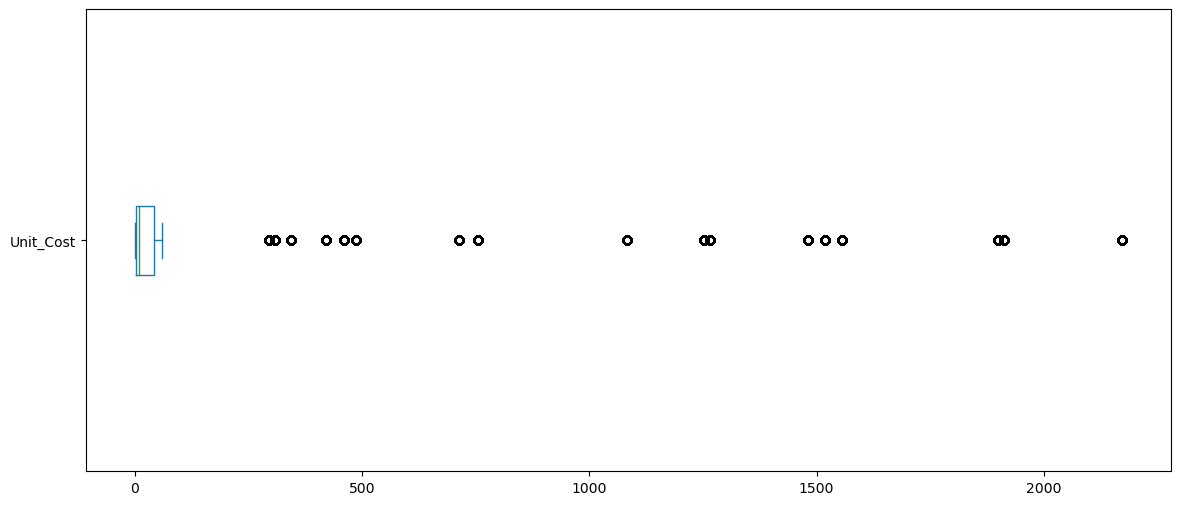

In [8]:
df['Unit_Cost'].plot(kind = 'box', vert = False, figsize = (14,6))

<Axes: ylabel='Density'>

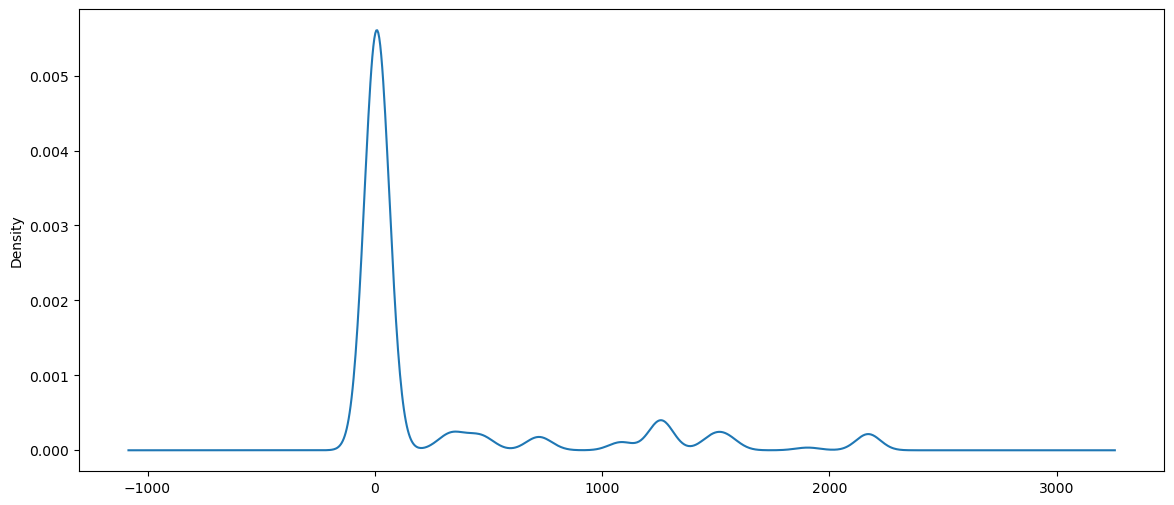

In [9]:
df['Unit_Cost'].plot(kind = 'density', figsize = (14,6))

In [10]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


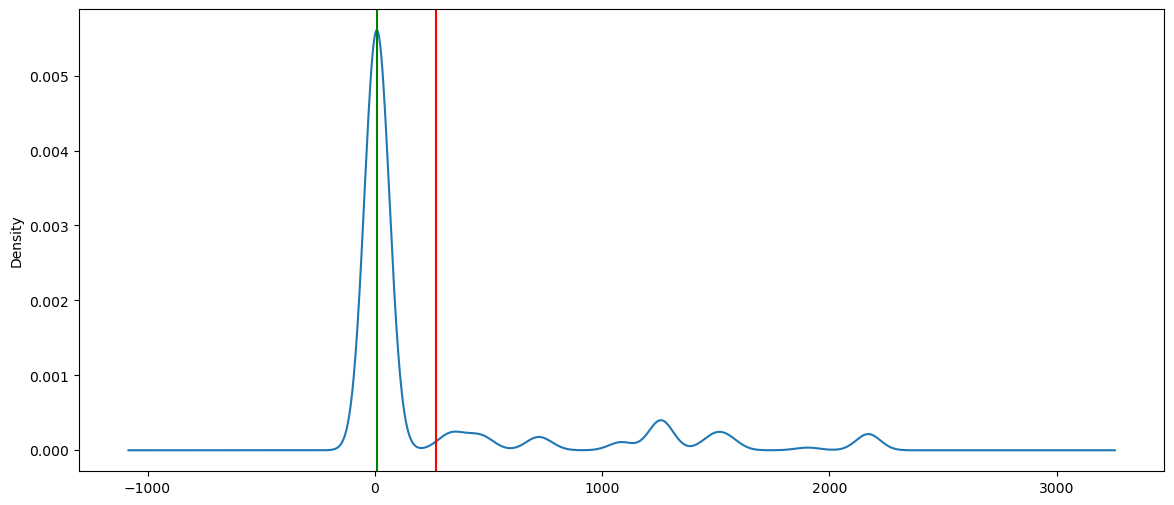

In [11]:
ax = df['Unit_Cost'].plot(kind='density', figsize = (14,6))
ax.axvline(df['Unit_Cost'].mean (), color = 'red')
ax.axvline (df['Unit_Cost'].median (), color = 'green')

Text(0.5, 0, 'dollars')

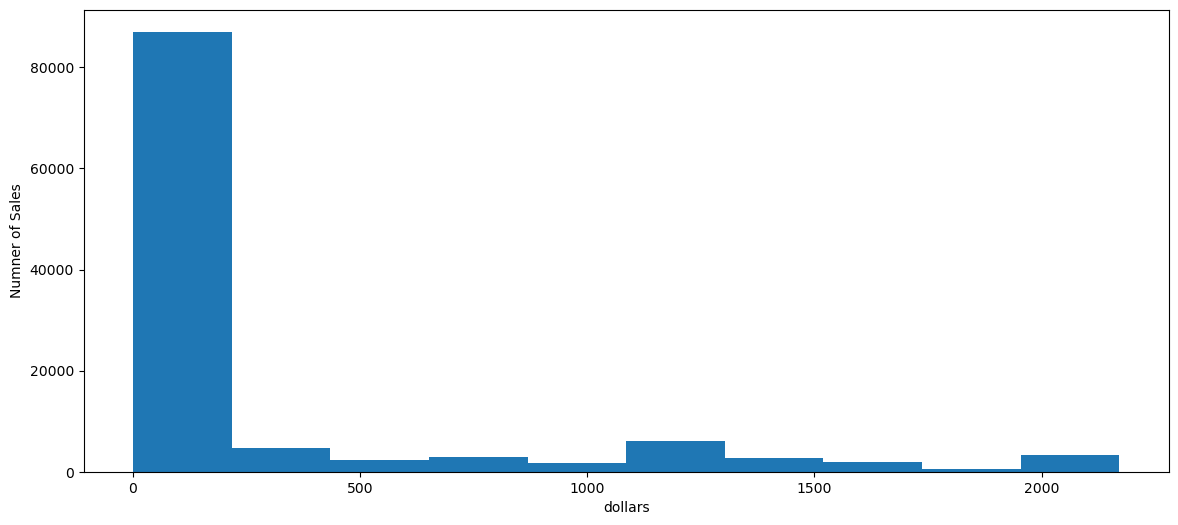

In [12]:
ax = df['Unit_Cost'].plot(kind = 'hist', figsize = (14,6))
ax.set_ylabel ('Numner of Sales')
ax.set_xlabel ('dollars')

In [13]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [14]:
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<Axes: ylabel='Age_Group'>

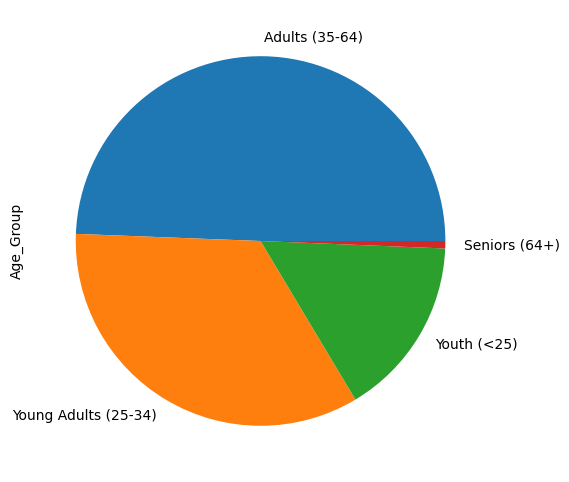

In [15]:
df['Age_Group'].value_counts().plot(kind = 'pie', figsize = (6,6))

TypeError: 'method' object is not subscriptable

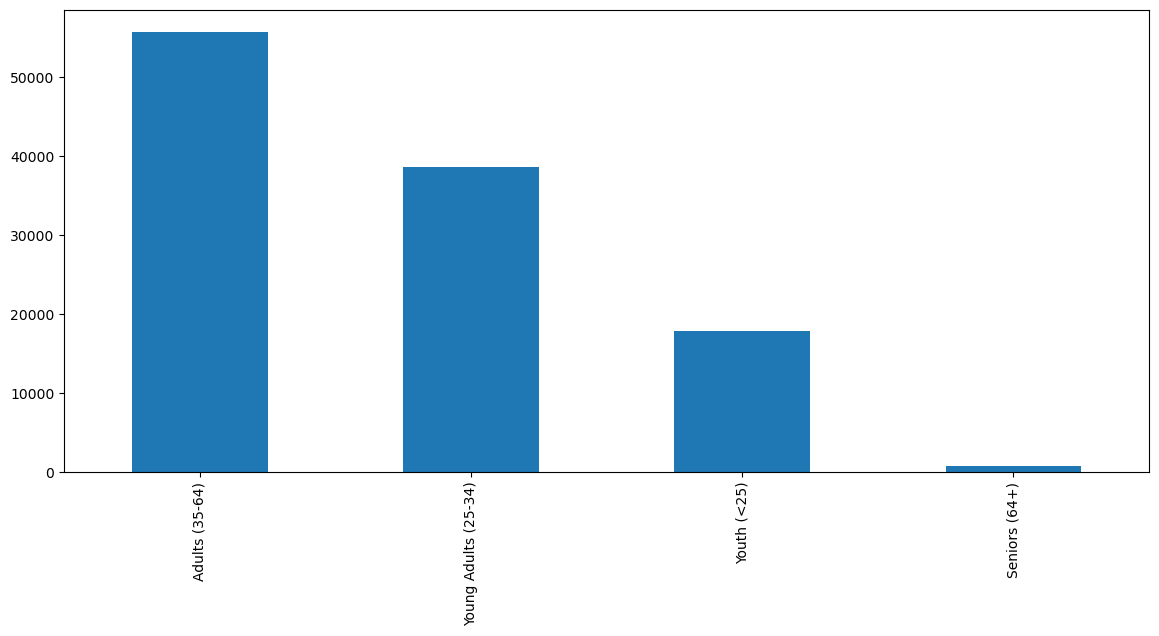

In [17]:
ax = df['Age_Group'].value_counts().plot(kind = 'bar', figsize = (14,6))
ax.set_ylabel['Number of sales']

In [19]:
corr = df.corr()

corr

C:\Users\Nisarg Patel\AppData\Local\Temp\ipykernel_3520\4075633031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


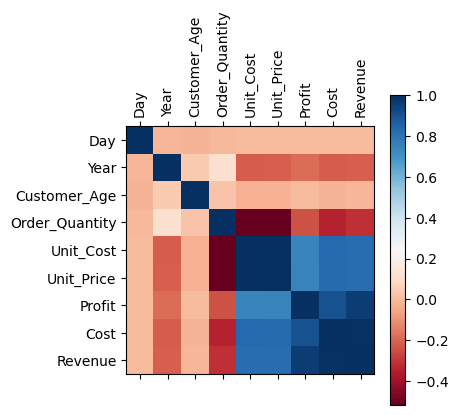

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)  # Corrected the cmap value from "Rdbu" to "RdBu"
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')  # Removed extra space before `range`
plt.yticks(range(len(corr.columns)), corr.columns)  # Fixed typo "coloumns" to "columns"
plt.colorbar()  # Optionally add a color bar for better interpretation
plt.show()  # Show the plot


In [32]:
df = df.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


<Axes: xlabel='Customer_Age', ylabel='Revenue'>

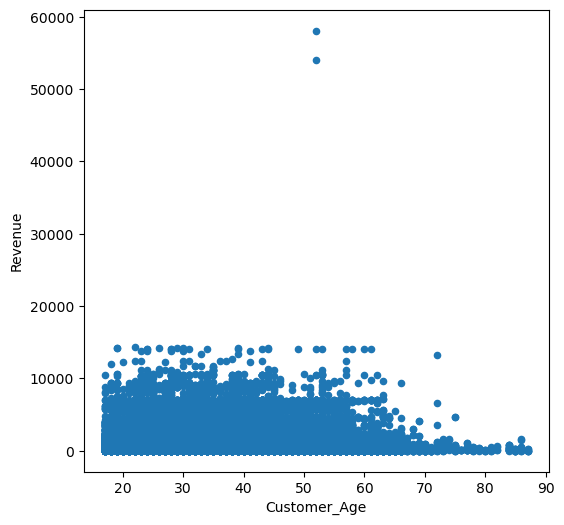

In [24]:
df.plot(kind='scatter', x = 'Customer_Age', y = 'Revenue', figsize = (6,6))

In [31]:
df = df.corr()

corr

C:\Users\Nisarg Patel\AppData\Local\Temp\ipykernel_3520\3679796331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


Text(0, 0.5, 'Profit')

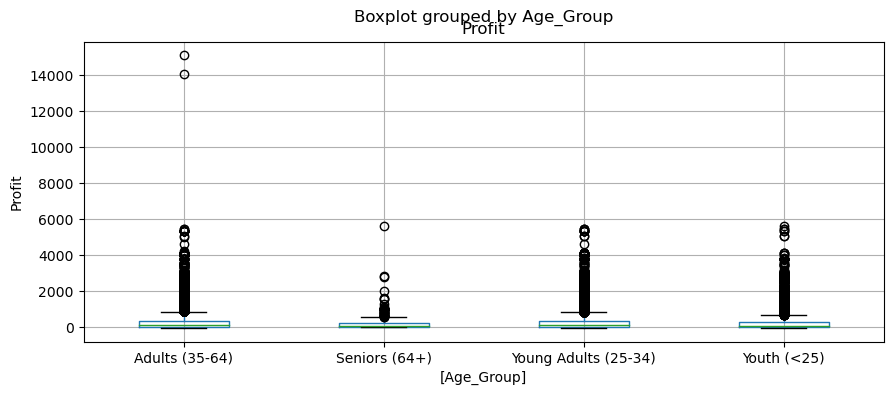

In [30]:
# Corrected code
ax = df[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 4))
ax.set_ylabel('Profit')  # Correctly set the y-axis label


Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

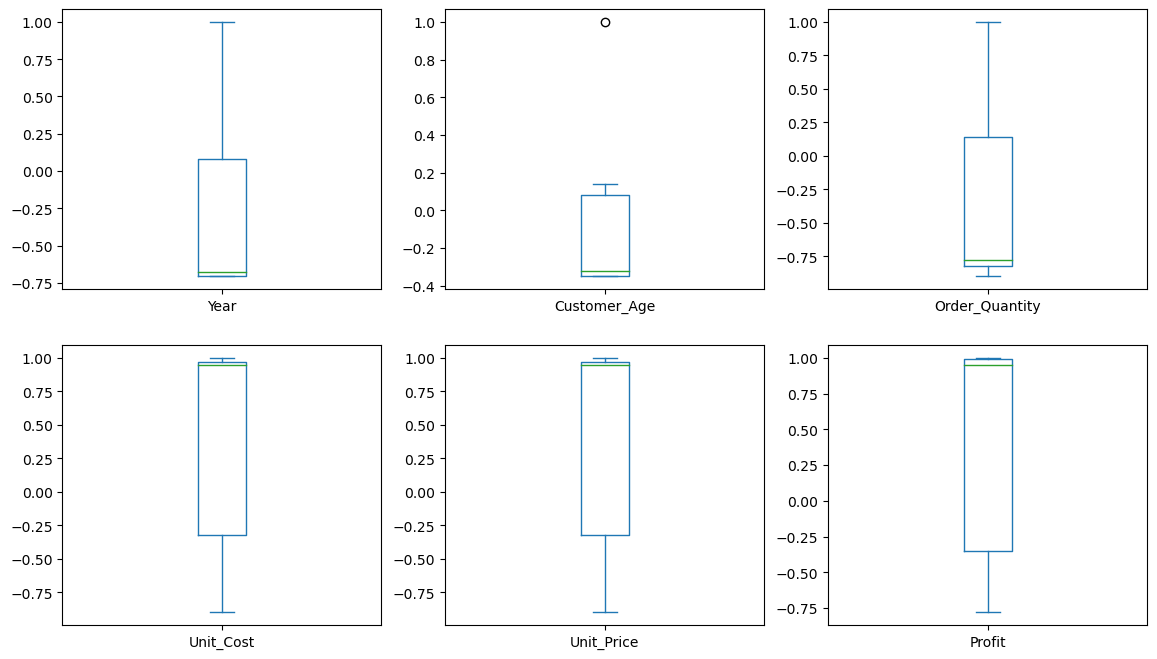

In [38]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
df[boxplot_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(14, 8))


In [44]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [46]:
#model
from sklearn.linear_model import LinearRegression  # Fixed typo: "LinerRegression" to "LinearRegression"
from sklearn.model_selection import train_test_split  # Correct as it is


In [67]:
train = df.drop(['Unit_Cost', 'Cost'], axis =1)
test = df['Profit']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)


In [69]:
regr = LinearRegression()  # Fixed typo: "LinerRegression" to "LinearRegression"


In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df['Date_numeric'] = df['Date'].map(pd.Timestamp.toordinal) 
    df = df.drop(['Date'], axis=1)  
df = df.fillna(0) 
features = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
target = 'Revenue'
X = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
regr = LinearRegression()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print(pred)


[ 44.00511194 386.11582122  42.8831819  ... -19.62354307  37.44507143
 160.40394093]


In [72]:
regr.score(x_test, y_test)

0.9430121128357015

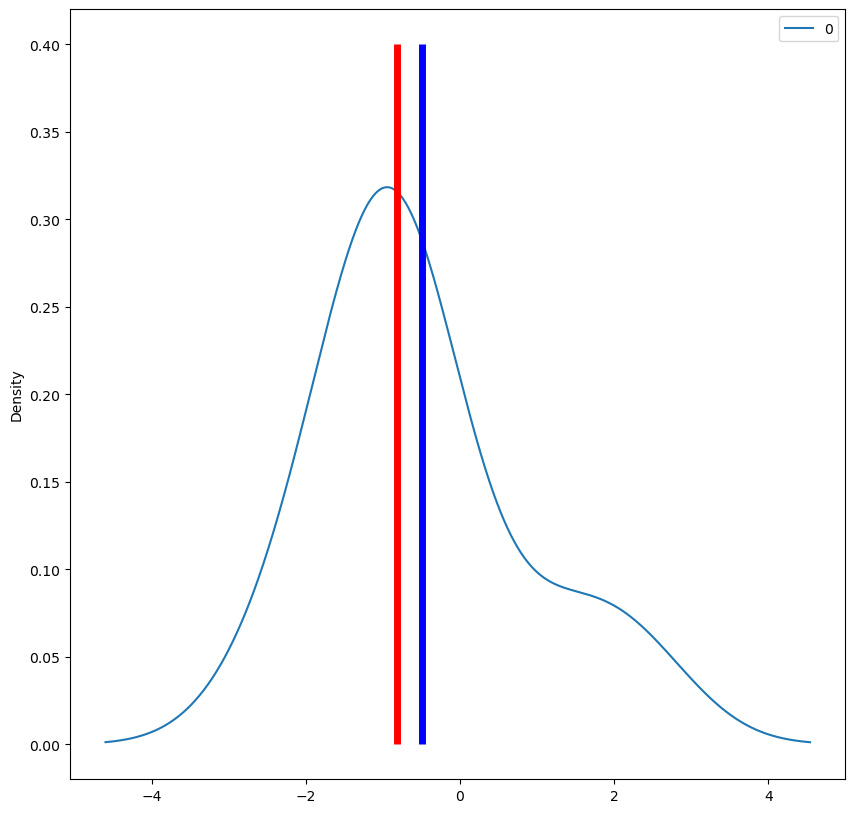

In [76]:
# Generate random normal data
norm_data = pd.DataFrame(np.random.normal(size=10))

# Plot density
norm_data.plot(kind="density", figsize=(10, 10))

# Add vertical lines for mean and median
plt.vlines(norm_data.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue')
plt.vlines(norm_data.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red')

# Show the plot
plt.show()

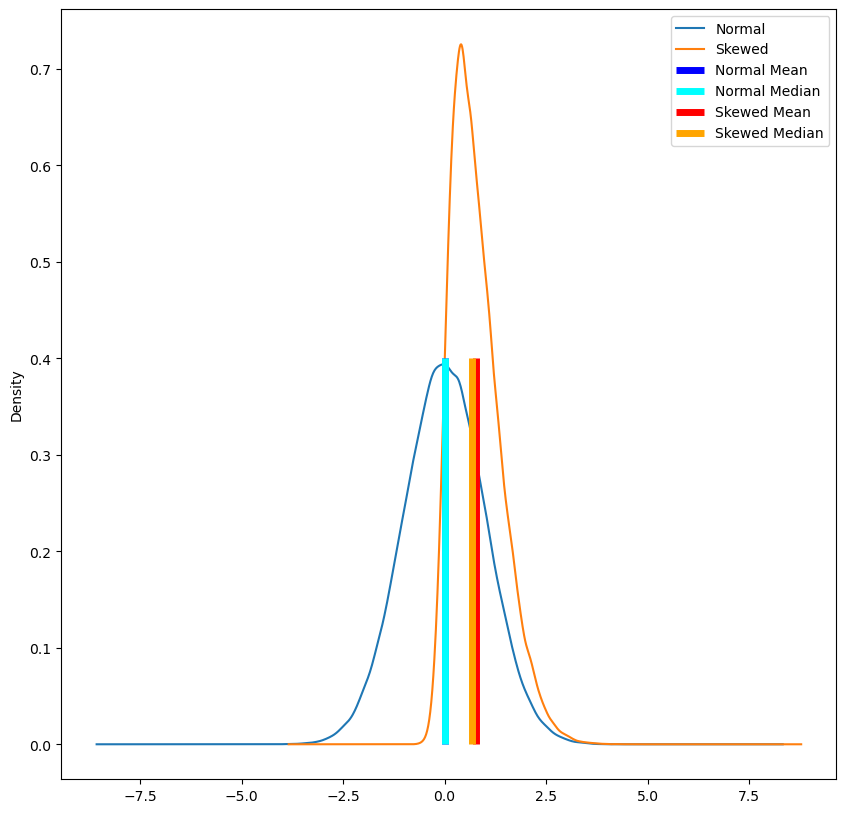

In [79]:
# Generate normal data
norm_data = np.random.normal(size=100000)
norm_df = pd.DataFrame(norm_data, columns=['Normal'])

# Generate skewed data
a = 5  # Skewness parameter
skewed_data = skewnorm.rvs(a, size=100000)
skewed_df = pd.DataFrame(skewed_data, columns=['Skewed'])

# Combine both dataframes
combined_df = pd.concat([norm_df, skewed_df], axis=1)

# Plot density for both datasets
plt.figure(figsize=(10, 10))
combined_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for means and medians
plt.vlines(norm_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Normal Mean')
plt.vlines(norm_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='cyan', label='Normal Median')
plt.vlines(skewed_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Skewed Mean')
plt.vlines(skewed_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='orange', label='Skewed Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

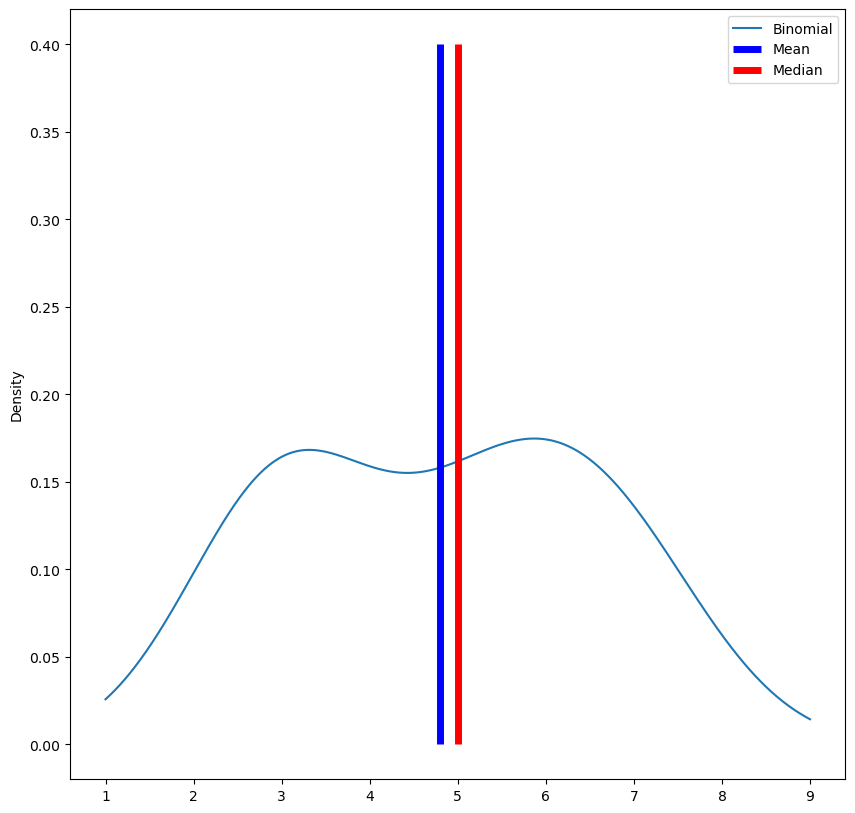

In [82]:
# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate binomial data
binom_data = binom.rvs(n, p, size=10)
binom_df = pd.DataFrame(binom_data, columns=['Binomial'])

# Plot density
plt.figure(figsize=(10, 10))
binom_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for mean and median
plt.vlines(binom_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Mean')
plt.vlines(binom_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

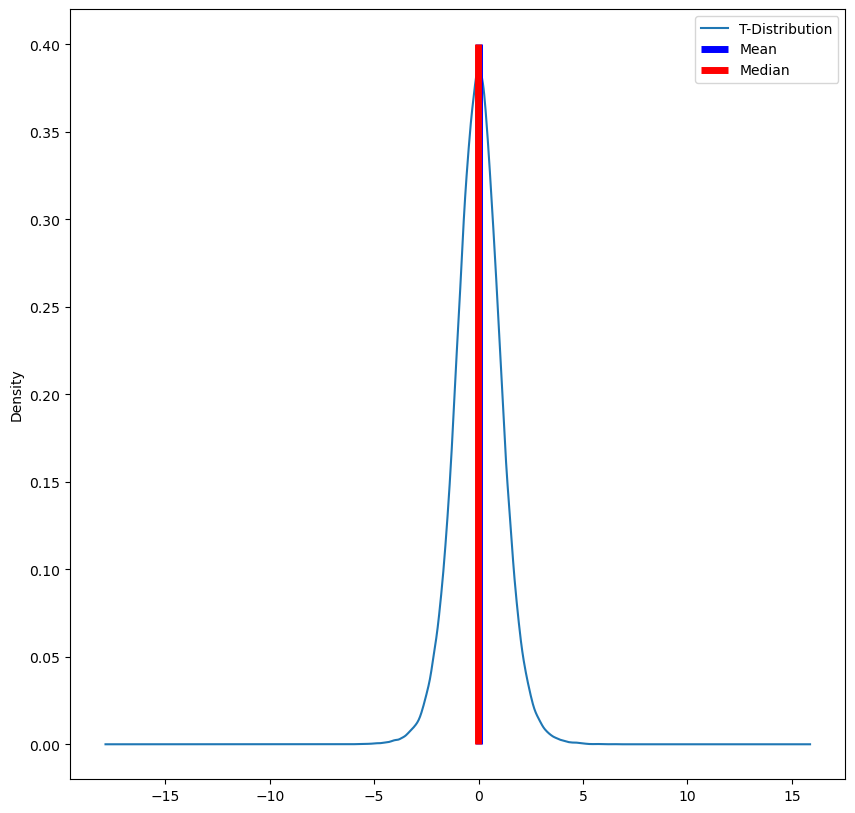

In [84]:
# Parameters for the t-distribution
df = 10  # Degrees of freedom

# Generate t-distribution data
t_data = t.rvs(df, size=100000)
t_df = pd.DataFrame(t_data, columns=['T-Distribution'])

# Plot density
plt.figure(figsize=(10, 10))
t_df.plot(kind="density", ax=plt.gca())

# Add vertical lines for mean and median
plt.vlines(t_df.mean(), ymin=0, ymax=0.4, linewidth=5.0, color='blue', label='Mean')
plt.vlines(t_df.median(), ymin=0, ymax=0.4, linewidth=5.0, color='red', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

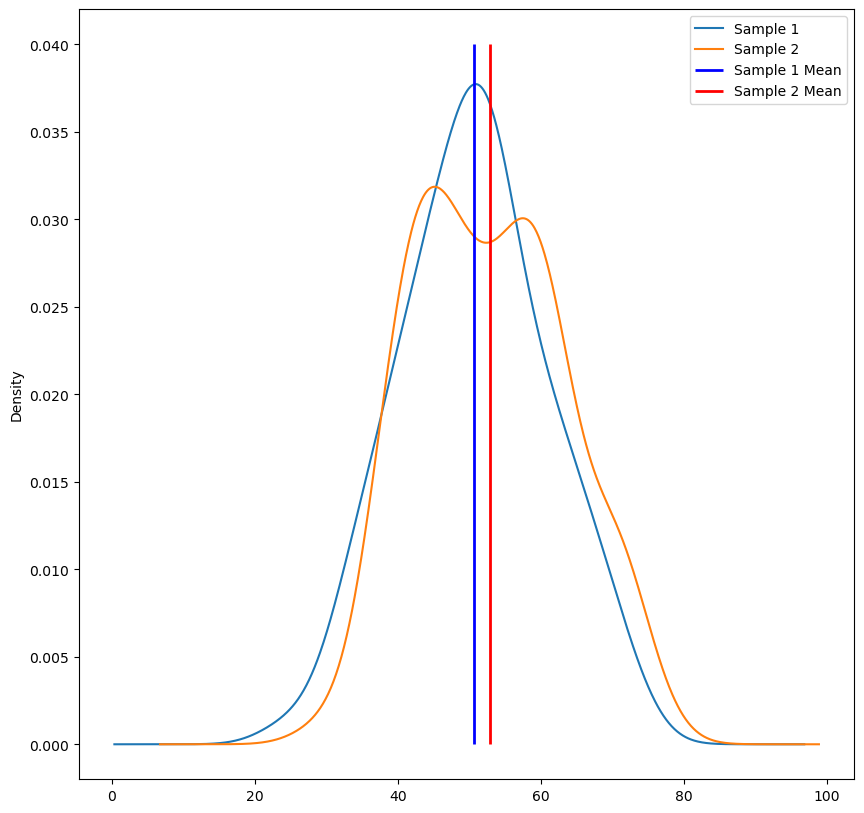

T-statistic: -1.53065199419143
P-value: 0.1274515248798546
We fail to reject the null hypothesis: There is no significant difference between the means of the two samples.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
np.random.seed(0) 
sample1 = np.random.normal(loc=50, scale=10, size=100) 
sample2 = np.random.normal(loc=52, scale=10, size=100) 

# Create a DataFrame
data = pd.DataFrame({'Sample 1': sample1, 'Sample 2': sample2})
plt.figure(figsize=(10, 10))
data.plot(kind="density", ax=plt.gca())
plt.vlines(data['Sample 1'].mean(), ymin=0, ymax=0.04, linewidth=2.0, color='blue', label='Sample 1 Mean')
plt.vlines(data['Sample 2'].mean(), ymin=0, ymax=0.04, linewidth=2.0, color='red', label='Sample 2 Mean')
plt.legend()
plt.show()
t_stat, p_value = ttest_ind(sample1, sample2)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference between the means of the two samples.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference between the means of the two samples.")
